In [1]:
from mb_rag.basic import ModelFactory

In [2]:
llm = ModelFactory(model_name="gemini-2.0-flash",model_type='google')
llm.invoke_query('What is the capital of France?')

'The capital of France is **Paris**.'

In [3]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [4]:
from mb_rag.agents.bb_autolabel import create_labeling_agent,LabelingGraph

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
agent = create_labeling_agent(llm.model,logging=False)

In [6]:
graph_agent = LabelingGraph(agent)

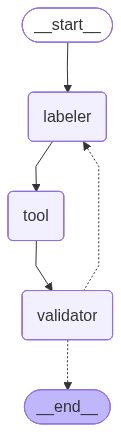

In [7]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

respone from LLM : content='```json\n{"robot dog": [[0.087, 0.055, 0.993, 0.942]]}\n```' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='lc_run--5022a4da-0cfc-4dd0-af99-855eaccf1f85-0' usage_metadata={'input_tokens': 1771, 'output_tokens': 38, 'total_tokens': 1809, 'input_token_details': {'cache_read': 0}}
BOXES : {"robot dog": [[0.087, 0.055, 0.993, 0.942]]}


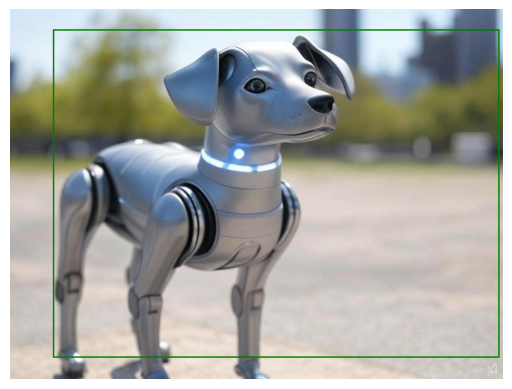

respone from LLM : content='{"valid": true}' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='lc_run--0ce6be45-728c-43bb-986c-a64b4f05cd2f-0' usage_metadata={'input_tokens': 1803, 'output_tokens': 5, 'total_tokens': 1808, 'input_token_details': {'cache_read': 0}}


AttributeError: 'str' object has no attribute 'get'

In [8]:
graph_agent.run(image_path='/home/malav/Downloads/image.jpg', query="Label the robot dog in the image.")